# Исследование объявлений о продаже квартир

**Содержание**
1. [Описание проекта](#desc)
2. [Обзор данных](#review)
3. [Предобработка данных](#pred)
4. [Расчеты и добавление данных в таблицу](#calc)
5. [Исследовательский анализ данных](#analiz)
6. [Итоговый вывод](#it)

<a id="desc"></a> 
## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id="review"></a> 
## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div style="font-size: 16px">

**Вывод**

Итак, в таблице 22 столбца. 

Согласно документации к данным:

• **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м) (тип данных - **float64**)\
• **balcony** — число балконов (тип данных - **float64**)\
• **ceiling_height** — высота потолков (м) (тип данных - **float64**)\
• **cityCenters_nearest** — расстояние до центра города (м) (тип данных - **float64**)\
• **days_exposition** — сколько дней было размещено объявление (от публикации до снятия) (тип данных - **float64**)\
• **first_day_exposition** — дата публикации (тип данных - **object**)\
• **floor** — этаж (тип данных - **int64**)\
• **floors_total** — всего этажей в доме (тип данных - **float64**)\
• **is_apartment** — апартаменты (тип данных - **bool**)\
• **kitchen_area** — площадь кухни в квадратных метрах (м²) (тип данных - **float64**)\
• **last_price** — цена на момент снятия с публикации (тип данных - **float64**)\
• **living_area** — жилая площадь в квадратных метрах (м²) (тип данных - **float64**)\
• **locality_name** — название населённого пункта (тип данных - **object**)\
• **open_plan** — свободная планировка (тип данных - **bool**)\
• **parks_around3000** — число парков в радиусе 3 км (тип данных - **float64**)\
• **parks_nearest** — расстояние до ближайшего парка (м) (тип данных - **float64**)\
• **ponds_around3000** — число водоёмов в радиусе 3 км (тип данных - **float64**)\
• **ponds_nearest** — расстояние до ближайшего водоёма (м) (тип данных - **float64**)\
• **rooms** — число комнат (тип данных - **int64**)\
• **studio** — квартира-студия (тип данных - **bool**)\
• **total_area** — площадь квартиры в квадратных метрах (м²) (тип данных - **float64**)\
• **total_images** — число фотографий квартиры в объявлении (тип данных - **int64**)

В названии колонки `cityCenters_nearest` есть нарушение стиля, надо это исправить.
В некоторых столбцах есть пропущенные значения.
Данные в столбце `first_day_exposition` представляют собой тип **object**, надо перевести их в тип **datetime64**.
У столбцов `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` и `days_exposition` тип данных **float64**, надо перевести эти данные в целочисленный тип.

<a id="pred"></a> 
## Предобработка данных

<div style="font-size: 16px">

**2.1 Переименуем столбец "cityCenters_nearest"**

In [5]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div style="font-size: 16px">

**2.2 Обработаем пропуски**

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в столбце `living_area` средней площадью в зависимости от числа комнат. Для этого создадим сначала небольшой датасет, где будет подсчитана средняя площадь для каждой группы rooms.

In [8]:
mean_living_area = df.groupby('rooms')['living_area'].mean()
total_living_area = pd.DataFrame({'total_living_area':mean_living_area}).reset_index()
total_living_area 

,rooms,total_living_area
0,0,18.865246
1,1,17.893552
2,2,31.736849
3,3,47.387941
4,4,66.983223
5,5,100.009247
6,6,130.983636
7,7,163.564151
8,8,168.683333
9,9,190.257143


Добавим к таблице столбец `total_living_area` со средним значением площади, соответствующим количеству комнат.

In [9]:
df = df.merge(total_living_area, on='rooms', how='left')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,47.387941
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.893552
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,31.736849
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,47.387941
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,31.736849


Заменим пропущенные значения в столбце `living_area`.

In [10]:
df['living_area'] = df['living_area'].fillna(value=df['total_living_area'])
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,47.387941
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.893552
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,31.736849
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,47.387941,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,47.387941
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,31.736849


Займемся пропусками в столбце `kitchen_area`. Сначала сгруппируем данные по числу комнат и найдем для каждой группы медианное соотношение кухни к жилой площади. Затем заменим пропуски.

In [11]:
ratio_kitchen_living = (df.groupby('rooms')['kitchen_area'].median()) / (df.groupby('rooms')['living_area'].median())
ratio_kitchen_living = pd.DataFrame({'ratio_kitchen_living':ratio_kitchen_living}).reset_index()
ratio_kitchen_living 

,rooms,ratio_kitchen_living
0,0,NaN
1,1,0.505210
2,2,0.283871
3,3,0.206927
4,4,0.169078
5,5,0.157620
6,6,0.154762
7,7,0.125628
8,8,0.155280
9,9,0.077411


Поскольку я предполагаю, что квартиры с нулевым значением количества комнат - это студии, где не выделена площадь кухни, поэтому в строчках, где **rooms == 0** в нулевой строке выплыл "NaN". Заменим его на **0**.

In [12]:
ratio_kitchen_living = ratio_kitchen_living.fillna(0)
ratio_kitchen_living

,rooms,ratio_kitchen_living
0,0,0.000000
1,1,0.505210
2,2,0.283871
3,3,0.206927
4,4,0.169078
5,5,0.157620
6,6,0.154762
7,7,0.125628
8,8,0.155280
9,9,0.077411


In [13]:
df = df.merge(ratio_kitchen_living, on='rooms', how='left')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,47.387941,0.206927
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.893552,0.505210
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,31.736849,0.283871
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,47.387941,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,47.387941,0.206927
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,31.736849,0.283871


In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(value=(df['ratio_kitchen_living'] * df['living_area']))

Заменим пропущенные значения в столбце `ceiling_height` медианой по столбцу `ceiling_height`.

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(value=df['ceiling_height'].median())
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,47.387941,0.206927
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,17.893552,0.505210
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,31.736849,0.283871
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,47.387941,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,47.387941,0.206927
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,31.736849,0.283871


Проверю столбец `days_exposition`.

In [16]:
df.query('days_exposition == 0')['days_exposition'].count()

0

Итак, в столбце `days_exposition` нет значения **0**. Заменю пропуски в этом столбце на **0** и в дальнейшем исследовании при построении графиков буду иметь ввиду, что значение **0** в этом столбце означает пропуск.

In [17]:
df['days_exposition'] = df['days_exposition'].fillna(value=0)

Предполагаю, что пропуски в столбце `balcony` означают, что в квартире нет балкона, поэтому их можно заменить значением **0**. А в столбце `is_apartment`, по аналогии с балконом, пропуск может означать, что квартира не является апартаментами, поэтому пропуск в этом столбце можно заменить значением **False**.

In [18]:
df['balcony'] = df['balcony'].fillna(value=0)

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

Пропуски в столбце `locality_name` заменим значением **unknown**.

In [20]:
df['locality_name'] = df['locality_name'].fillna(value='unknown')

Когда я выводила пропуск в таблице, я заметила , что в 4 столбцах стоят очень похожие цифры. Проверю, связаны ли эти значения друг с другом.

In [21]:
display(df['parks_around3000'].isna().sum())
display(df['ponds_around3000'].isna().sum())
display(df['airports_nearest'].isna().sum())
df['city_centers_nearest'].isna().sum()

5518

5518

5542

5519

In [22]:
df[(df['parks_around3000'].isna()) & (df['parks_nearest'].isna()) & (df['airports_nearest'].isna()) & (df['city_centers_nearest'].isna())].shape[0]

5518

Проверю, связаны ли нулевые значения в `parks_around3000` с пропущенными значениями в столбце `parks_nearest`,а нулевые значения в `ponds_around3000` с пропущенными значениями в столбце `ponds_nearest`.

In [23]:
display(df[(df['parks_around3000'] == 0)].shape[0])
df[(df['parks_around3000'] == 0) & (df['parks_nearest'].isna())].shape[0]

10106

10102

In [24]:
display(df[(df['ponds_around3000'] == 0)].shape[0])
df[(df['ponds_around3000'] == 0) & (df['ponds_nearest'].isna())].shape[0]

9071

9071

In [25]:
df[(df['parks_nearest'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living


In [26]:
df[(df['ponds_nearest'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living


In [27]:
df[(df['city_centers_nearest'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living


Итак, данные в этих столбцах коррелируют друг с другом. Поскольку данные о расстояниях заполнялись автоматически на основе картографических данных, предположу, что в системе не было данных по этим адресам. Думаю, что пропущенные значения во всех этих столбцах можно заменить на **0** А при построении графиков и сводных таблиц указывать значение столбца`city_centers_nearest` и других столбцов с  расстояниями строго больше **0**. 

In [28]:
 df['airports_nearest'] = df['airports_nearest'].fillna(value=0)
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['parks_nearest'] = df['parks_nearest'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=0)

В колонке `floors_total` всего 86 пропущенных значений, это 0,36% от всего датасета. Думаю, что строки с этими пропущенными значениями можно удалить.             

In [29]:
df = df.dropna(subset=['floors_total'])

In [30]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
total_living_area       0
ratio_kitchen_living    0
dtype: int64

<div style="font-size: 16px">

**2.3 Поменяем тип данных**

In [31]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
total_living_area       float64
ratio_kitchen_living    float64
dtype: object

В столбце `first_day_exposition` поменяем тип данных на **datetime64**. Также в столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` поменяем тип на **int**, так как эти столбцы обозначают количество объектов, которое не может быть дробным числом.\
И еще я поменяю тип на целочисленный в колонках `living_area`, `kitchen_area`, `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest`, `days_exposition` - для более красивого и наглядного отображения данных.  

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [33]:
list_columns = ['balcony', 'parks_around3000', 'ponds_around3000', 'living_area','kitchen_area', 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']

for column in list_columns:
    df[column] = df[column].astype(int)

In [34]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                      int64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                     int64
balcony                          int64
locality_name                   object
airports_nearest                 int64
city_centers_nearest             int64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                  int64
total_living_area              float64
ratio_kitchen_living           float64
dtype: object

<div style="font-size: 16px">

**2.4 Проверка на явные и неявные дубликаты**

In [35]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В колонке `locality_name` я обнаружила неявные дубликаты, например, **поселок Мурино** и **посёлок Мурино**. Надо привести эти названия к единому стилю, чтобы это не отразилось на результатах дальнейшего исследования. Надо заменить все **ё** на **е**.


Напишем функцию, которая заменяет в строке все **ё** на **е**.

In [36]:
def replace_e(name):
    name = name.replace('ё', 'е')
    return name

In [37]:
df['locality_name'] = df['locality_name'].apply(replace_e)

In [38]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [39]:
df.duplicated().sum() # проверим явные дубликаты

0

**Вывод**\
Итак, данные привели в порядок: обработали пропуски, избавились от дубликатов, поменяли, где нужно, тип данных. Можно двигаться дальше.

<a id="calc"></a> 
## Расчёты и добавление результатов в таблицу

Добавлю в таблицу столбец `price_sq_metre`, в котором будет указана цена за квадратный метр.

In [40]:
df['price_sq_metre'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51,8,False,...,18863,16028,1,482,2,755,0,47.387941,0.206927,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18,1,False,...,12817,18603,0,0,0,0,81,17.893552,0.505210,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34,4,False,...,21741,13933,1,90,2,574,558,31.736849,0.283871,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,47,9,False,...,28098,6800,2,84,3,234,424,47.387941,0.206927,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,31856,8098,2,112,1,48,121,31.736849,0.283871,100000.000000


Добавлю столбец с соотношением жилой и общей площади, а также столбец с отношением кухни к общей площади. 

In [41]:
df['ratio_living_area'] = df['living_area'] / df['total_area']

In [42]:
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area']

In [43]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51,8,False,...,1,482,2,755,0,47.387941,0.206927,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18,1,False,...,0,0,0,0,81,17.893552,0.505210,82920.792079,0.445545,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34,4,False,...,1,90,2,574,558,31.736849,0.283871,92785.714286,0.607143,0.142857
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,47,9,False,...,2,84,3,234,424,47.387941,0.206927,408176.100629,0.295597,0.056604
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,2,112,1,48,121,31.736849,0.283871,100000.000000,0.320000,0.410000


Напишем функцию, которая разделит данные об этаже квартиры на 3 группы - **первый этаж**, **последний этаж**, **другой**.

In [44]:
def floor_group(row):
    #"""
    #Возвращает группу по этажу квартиры `floor`, используя правила:
    #- 'первый этаж', если floor = 1;
    #- 'последний этаж', если floor == floors_total
    #- 'другой этаж' — в иных случаях.
    #"""
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой' 

In [45]:
df['floor_group'] = df.apply(floor_group, axis=1) 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51,8,False,...,482,2,755,0,47.387941,0.206927,120370.370370,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18,1,False,...,0,0,0,81,17.893552,0.505210,82920.792079,0.445545,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34,4,False,...,90,2,574,558,31.736849,0.283871,92785.714286,0.607143,0.142857,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,47,9,False,...,84,3,234,424,47.387941,0.206927,408176.100629,0.295597,0.056604,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,112,1,48,121,31.736849,0.283871,100000.000000,0.320000,0.410000,другой


Добавим столбец с днем недели, а также с месяцем и годом публикации объявления.

In [46]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [47]:
df['month'] = df['first_day_exposition'].dt.month

In [48]:
df['year'] = df['first_day_exposition'].dt.year

In [49]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area,floor_group,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51,8,False,...,0,47.387941,0.206927,120370.370370,0.472222,0.231481,другой,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18,1,False,...,81,17.893552,0.505210,82920.792079,0.445545,0.272277,первый,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34,4,False,...,558,31.736849,0.283871,92785.714286,0.607143,0.142857,другой,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,47,9,False,...,424,47.387941,0.206927,408176.100629,0.295597,0.056604,другой,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,121,31.736849,0.283871,100000.000000,0.320000,0.410000,другой,1,6,2018


**Вывод**\
В таблицу были добавлены следующие расчеты: цена за квадратный метр, соотношение жилой и общей площади, отношение кухни к общей площади.Также добавили колонки с днем недели, месяцем и годом подачи объявления и сделали категоризацию данных в зависимости от этажа (первый, последний, другой).

<a id="analiz"></a> 
## Исследовательский анализ данных

<div style="font-size: 16px">

**4.1 Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков.**

In [50]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,60.340678,6.540555e+06,2.071147,2.724581
std,35.648988,1.090172e+07,1.078380,0.990085
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.800000,6.799000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


**График для total_area**

Построим для начала boxplot, чтобы увидеть выбросы.

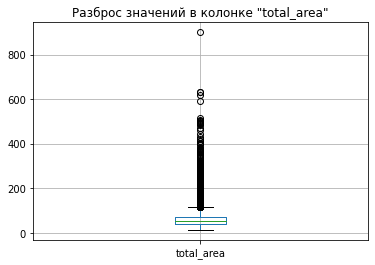

In [51]:
df[['total_area']].boxplot()
plt.title('Разброс значений в колонке "total_area"');

Итак, отсечем значения свыше 400 кв.м. для большей наглядности, так как квартиры с такими большими площадями очень редки. 

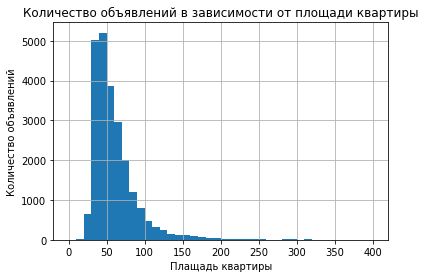

In [52]:
df['total_area'].hist(bins=40, range=(0,400))
plt.title('Количество объявлений в зависимости от площади квартиры')
plt.xlabel('Плащадь квартиры')
plt.ylabel('Количество объявлений');

**Вывод**
* На графике видно, что самое большое количество квартир в датасете с площадью около 40-50 кв.м. Квартир с площадью свыше 200 кв.м мало. А квартир с площадью больше 320 кв.м единичные случаю, так как график стремится к 0.

**График для last_price**

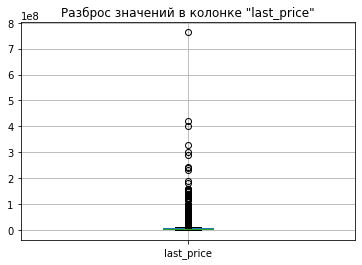

In [53]:
df[['last_price']].boxplot()
plt.title('Разброс значений в колонке "last_price"');

Есть единичные случаи с очень большими суммами, и эти выбросы мешают наглядности. Отбросим их.

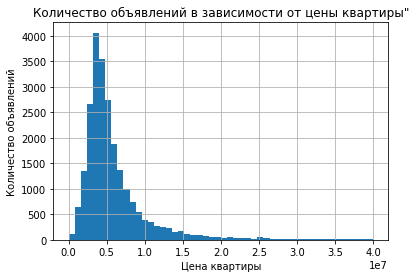

In [54]:
df['last_price'].hist(bins=50,range=(0,40000000))
plt.title('Количество объявлений в зависимости от цены квартиры"')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество объявлений');

**Вывод**

* График с ценой показывает пик около значения 0,4е+7 (или 4000000). А квартир с ценой более 2,7е+7 очень мало.

**График для rooms**

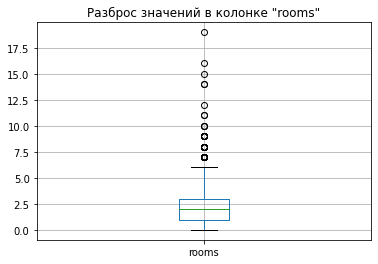

In [55]:
df[['rooms']].boxplot()
plt.title('Разброс значений в колонке "rooms"');

В графике с ценой есть единичные квартиры с очень большим количеством комнат. Такие данные можно отбросить, чтобы не искажать дальнейшие выводы.

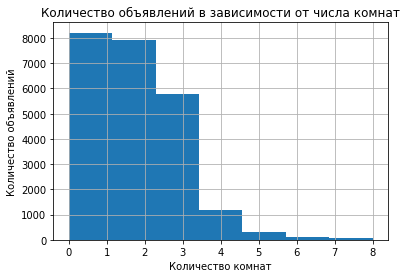

In [56]:
df['rooms'].hist(bins=7, range=(0,8))
plt.title('Количество объявлений в зависимости от числа комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений');

**Вывод**

* В таблице наибольшее число квартир - это квартиры с количеством комнат 0 (это студии) и 1-4. Квартир с количеством комнат > 6 совсем мало.

**График для ceiling_height**

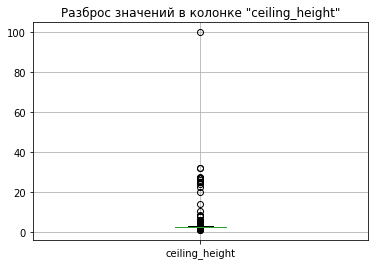

In [57]:
df[['ceiling_height']].boxplot()
plt.title('Разброс значений в колонке "ceiling_height"');

В графике с высотой потолков видны аномальные значения высоты потолков. Например, 100 м. И минимальное значение потолка, равное 1 м, тоже не очень правдоподобно.

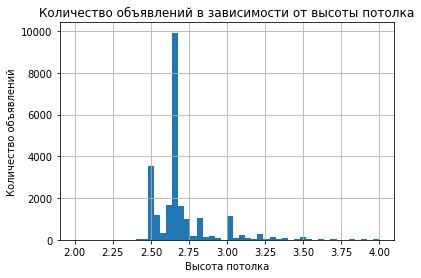

In [58]:
df['ceiling_height'].hist(bins=50, range=(2,4))
plt.title('Количество объявлений в зависимости от высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

**Вывод**

* На графике виден пик около значения 2,65 м. Это значит, что наибольшее количество квартир имеет высоту потолка около 2,65 м.


<div style="font-size: 16px">

**4.2 Проанализируем время продажи квартиры.**

In [59]:
df['days_exposition'].describe()

count    23613.000000
mean       156.586075
std        213.502550
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

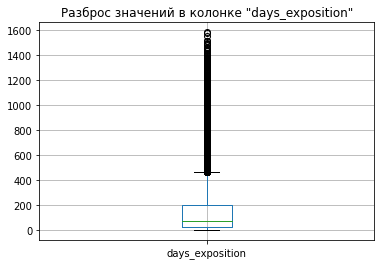

In [60]:
df[['days_exposition']].boxplot()
plt.title('Разброс значений в колонке "days_exposition"');

Итак, "ящик с усами" показал, что большинство квартир продаются за период времени до 200 дней. 

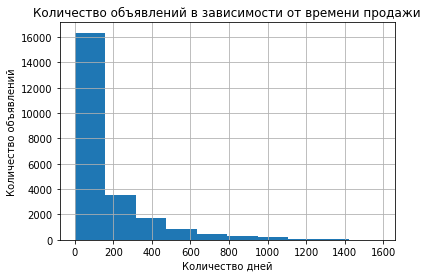

In [61]:
df['days_exposition'].hist()
plt.title('Количество объявлений в зависимости от времени продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

Немного усечем данные.

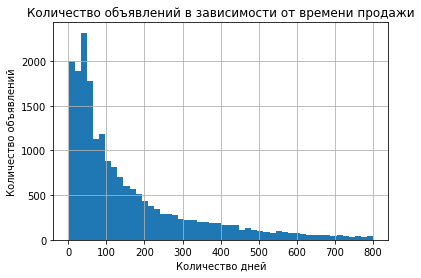

In [62]:
df['days_exposition'].hist(bins=50, range=(1,800))
plt.title('Количество объявлений в зависимости от времени продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

**Вывод**\
Большинство квартир продают в среднем до **200** дней. Пик значений приходится на период около 50 дней. Учитывая то, что разница между медианой и средним арифметическим высокая, это значит, в столбце есть выбросы. Квартиры с периодом после 800 дней уже редки, но тем не менее их достаточно много.  

<div style="font-size: 16px">

**4.3 Уберем редкие и выбивающиеся значения**

In [63]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area,weekday,month,year
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,...,23613.000000,23613.000000,23613.000000,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.724581,10.673824,34.167111,5.877313,10.146360,0.593063,...,198.852158,156.586075,34.447236,0.329156,9.939748e+04,0.560055,0.181876,2.568035,6.400076,2017.368102
std,5.681541,1.090172e+07,35.648988,1.078380,0.990085,6.597173,21.824245,4.873539,5.750738,0.960307,...,305.184698,213.502550,19.257332,0.133197,5.035802e+04,0.112638,0.074875,1.788565,3.493160,1.039383
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,17.893552,0.000000,1.118349e+02,0.021583,0.000000,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,0.000000,22.000000,17.893552,0.206927,7.656250e+04,0.485714,0.129032,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,73.000000,31.736849,0.283871,9.500000e+04,0.562500,0.166667,3.000000,6.000000,2017.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.000000,8.000000,11.000000,1.000000,...,389.000000,199.000000,47.387941,0.505210,1.142061e+05,0.635135,0.225806,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.000000,33.000000,112.000000,5.000000,...,1344.000000,1580.000000,409.700000,0.505210,1.907500e+06,1.620278,0.787879,6.000000,12.000000,2019.000000


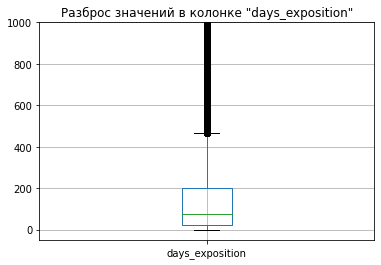

In [64]:
df[['days_exposition']].boxplot()
plt.title('Разброс значений в колонке "days_exposition"')
plt.ylim(-50, 1000);

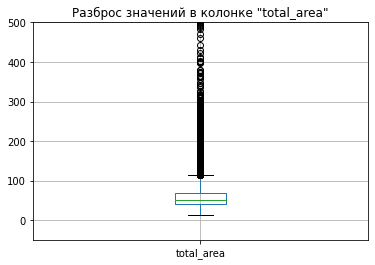

In [65]:
df[['total_area']].boxplot()
plt.ylim(-50, 500)
plt.title('Разброс значений в колонке "total_area"');

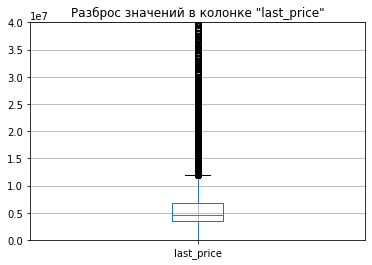

In [66]:
df[['last_price']].boxplot()
plt.ylim(-50, 40000000)
plt.title('Разброс значений в колонке "last_price"');

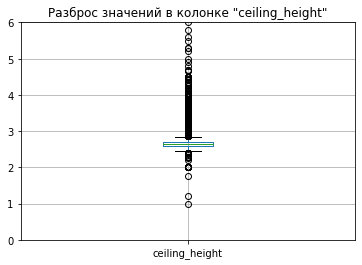

In [67]:
df[['ceiling_height']].boxplot()
plt.ylim(0, 6)
plt.title('Разброс значений в колонке "ceiling_height"');

**Вывод**

Проанализировав выше графики, я выявила, что редкие и аномальные значения есть в нескольких столбцах. 
* В столбце `total_area` квартиры с площадью более 200 кв.метров редки. Поэтому их можно отсечь для дальнейшего исследования.
* В столбце `rooms` квартир с количеством комнат более 7 очень мало.
* В столбце `last_price` есть значение 12190, какое-то нереальное значение для квартиры. И квартир, которые стоят более 26000000, очень мало. Думаю, можно отсечь квартиры с ценой ниже 100000 и свыше 26000000.
* В столбце `ceiling_height` есть аномальные значения: например, 1 метр или 100 метров. Скорей всего, это опечатка. Думаю, надо отбросить значения ниже 2.5 м и свыше 4 метров.





Сделаем срез по таблице, выбрав "хорошие" данные, для того, чтобы дальнейшее исследование было более показательным. Для среза я выберу квартиры с площадью не более 200 кв.м, с количеством комнат не более 8, с ценой от 100000 до 26000000 и высотой потолков от 2,5 до 4 м.

In [68]:
good_data = df.query('total_area <= 200 and  rooms <= 8 and 100000 <= last_price <= 26000000 and  2.5 <= ceiling_height <= 4')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22978 non-null  int64         
 1   last_price            22978 non-null  float64       
 2   total_area            22978 non-null  float64       
 3   first_day_exposition  22978 non-null  datetime64[ns]
 4   rooms                 22978 non-null  int64         
 5   ceiling_height        22978 non-null  float64       
 6   floors_total          22978 non-null  float64       
 7   living_area           22978 non-null  int64         
 8   floor                 22978 non-null  int64         
 9   is_apartment          22978 non-null  bool          
 10  studio                22978 non-null  bool          
 11  open_plan             22978 non-null  bool          
 12  kitchen_area          22978 non-null  int64         
 13  balcony         

Сравним статистические данные для изначального и отфильтрованного датасета.

**Изначальная таблица**

In [69]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()


,total_area,last_price,rooms,ceiling_height
count,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,60.340678,6.540555e+06,2.071147,2.724581
std,35.648988,1.090172e+07,1.078380,0.990085
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.800000,6.799000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


**Отфильтрованная таблица**

In [70]:
good_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,22978.000000,2.297800e+04,22978.000000,22978.000000
mean,57.174418,5.589332e+06,2.017843,2.687763
std,24.783094,3.649041e+06,0.980568,0.193738
min,12.000000,4.300000e+05,0.000000,2.500000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,51.100000,4.600000e+06,2.000000,2.650000
75%,68.000000,6.550000e+06,3.000000,2.700000
max,200.000000,2.600000e+07,8.000000,4.000000


**Вывод**

Итак, в срезе получилось 22978 строк. Это 96% от изначальной таблицы. Немного урезав данные, избавившись от выбросов, можно увидеть, что в новом датасете по всем параметрам уменьшилось стандартное отклонение, а это значит,что новые данные стали более однородными. Теперь можно по усеченному датасету с "хорошими данными" изучать, какие факторы влияют на стоимость квартиры.

<div style="font-size: 16px">
 
**4.4 Какие факторы больше всего влияют на стоимость квартиры?** 

<div style="font-size: 20px">
Рассмотрим сначала влияние таких факторов, как площадь и удаленность от центра. 

Создадим датасет с нужными столбцами, чтобы построить матрицу диаграмм рассеяния. Таким образом мы узнаем, как такие факторы, как эти факторы влияют на стоимость квартиры.

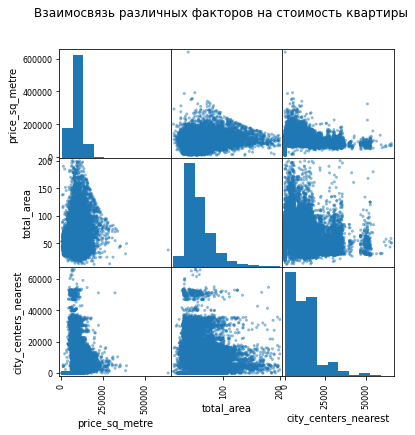

In [71]:
good_data_stat = good_data.loc[:, ['price_sq_metre', 'total_area', 'city_centers_nearest']]  
pd.plotting.scatter_matrix(good_data_stat, figsize=(6,6))
plt.suptitle('Взаимосвязь различных факторов на стоимость квартиры');

In [72]:
good_data_stat.corr()

,price_sq_metre,total_area,city_centers_nearest
price_sq_metre,1.000000,0.125327,0.119793
total_area,0.125327,1.000000,-0.052826
city_centers_nearest,0.119793,-0.052826,1.000000


**Вывод**

Итак, на графике видно, что есть совсем небольшая зависимость между ценой за квадратный метр и площадью квартиры: при увеличении площади квартиры цена за квадратный метр немного уменьшается. Есть также небольшая связь и между ценой и удаленностью от центра: видно, чем дальше от центра, тем меньше цена. Есть несколько точек, которые выбиваются, но их мало. Еще видно, что дорогих и больших квартир меньше, и там больше разброс признаков.

<div style="font-size: 20px">

Теперь посмотрим, зависит ли цена от количества комнат. Для этого построим график.

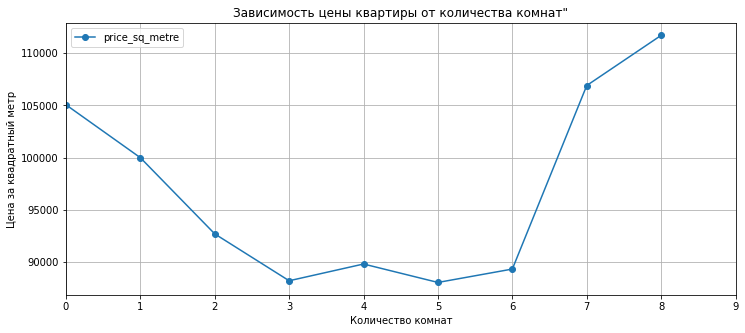

In [73]:
(
    good_data.pivot_table(index='rooms', values='price_sq_metre', aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0, 9), figsize=(12, 5))
) 
plt.title('Зависимость цены квартиры от количества комнат"')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр');

**Вывод**

На графике видно, что цена за кв.м. квартир с количеством комнат до 3 понижается. Цена 3-,4-, 5-и 6- комнатных квартир примерно на одном уровне. А квартиры с 7 и 8 комнатами самые дорогие.

<div style="font-size: 20px">

Посмотрим, зависит ли цена квартиры от того, на каком этаже находится квартира. Для этого сделаем сводную таблицу.

In [74]:
(
    good_data.pivot_table(index='floor_group', values='price_sq_metre', aggfunc='median')
             .sort_values(by='price_sq_metre', ascending=False)
)

,price_sq_metre
floor_group,
другой,97747.747748
последний,86888.914173
первый,81132.075472


**Вывод**

Видно, что на первом этаже квартиры стоят дешевле всего. Самые дорогие квартиры - на отстальных этажах, помимо последнего.

<div style="font-size: 20px">

Изучим зависимость цены квартиры от даты размещения: дня недели, месяца и года.

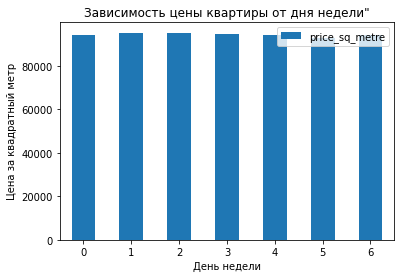

In [75]:
(
    good_data.pivot_table(index='weekday', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='weekday',y='price_sq_metre', rot=0)
)
plt.title('Зависимость цены квартиры от дня недели"')
plt.xlabel('День недели')
plt.ylabel('Цена за квадратный метр');

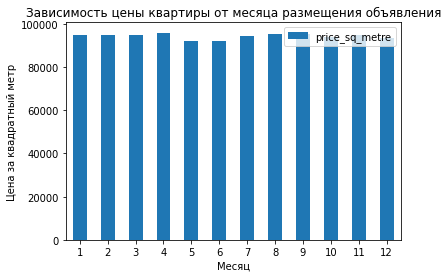

In [76]:
(
    good_data.pivot_table(index='month', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='month',y='price_sq_metre', rot=0)
) 
plt.title('Зависимость цены квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр');

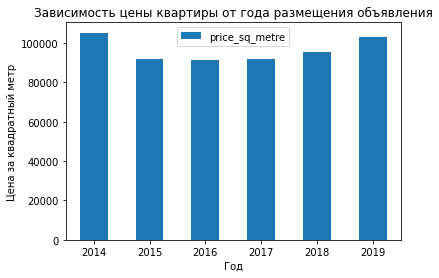

In [77]:
(
    good_data.pivot_table(index='year', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='year',y='price_sq_metre', rot=0)
)  
plt.title('Зависимость цены квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена за квадратный метр');

**Вывод**

* Зависимости цены от дня недели нет.
* По месяцам цена тоже не сильно отличается. Есть небольшой спад цены в мае и июне.
* Самые высокие цены на квартиры были в 2014.В 2015 году цены немного упали, потом постепенно цены начали расти.

**Вывод по всем факторам**

Проанализировав основные факторы, которые могут повлиять на цену квартиры. Я выяснила, что на цену больше всего влияет количество комнат в квартире, площадь, удаленность от центра и то, на каком этаже находится квартира.

<div style="font-size: 16px">
 
**4.5 Найдем 10 населённых пунктов с наибольшим числом объявлений.**

Сохраним в новом датасете первые 10 населенных пунктов с наибольшим количеством объявлений.

In [78]:
max_ads_locality = good_data['locality_name'].value_counts().head(10)
max_ads_locality

Санкт-Петербург      15090
поселок Мурино         550
поселок Шушары         439
Всеволожск             396
Пушкин                 358
Колпино                336
поселок Парголово      325
Гатчина                306
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64

Сделаем срез по основной таблице, где выберем строки только с теми городами, которые вошли в  нашу десятку. Для этого сначала наш датасет с десяткой городов превратим список, чтобык нему можно было обращаться в запросе, как к внешней переменной.

In [79]:
max_ads_locality = max_ads_locality.index.tolist()
max_ads_loc = good_data.query('locality_name in @max_ads_locality')
max_ads_loc

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area,floor_group,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51,8,False,...,0,47.387941,0.206927,120370.370370,0.472222,0.231481,другой,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18,1,False,...,81,17.893552,0.505210,82920.792079,0.445545,0.272277,первый,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34,4,False,...,558,31.736849,0.283871,92785.714286,0.607143,0.142857,другой,3,8,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32,13,False,...,121,31.736849,0.283871,100000.000000,0.320000,0.410000,другой,1,6,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10,6,False,...,155,17.893552,0.505210,99195.710456,0.268097,0.375335,другой,3,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16,4,False,...,29,17.893552,0.505210,100566.572238,0.453258,0.254958,другой,2,2,2018
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31,2,False,...,15,31.736849,0.283871,105769.230769,0.596154,0.115385,другой,3,7,2018
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40,7,False,...,519,31.736849,0.283871,129903.978052,0.548697,0.137174,другой,3,10,2016
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73,3,False,...,0,47.387941,0.206927,72490.845228,0.545550,0.097153,другой,1,3,2017


In [80]:
max_ads_loc = max_ads_loc.groupby(['locality_name']).agg({'locality_name':['count'], 'price_sq_metre':['mean']})
max_ads_loc.columns = ['count_ads', 'mean_sq_meter']
max_ads_loc.sort_values(by='mean_sq_meter')

,count_ads,mean_sq_meter
locality_name,,
Выборг,234,58190.128008
Всеволожск,396,68670.459639
Гатчина,306,68757.678644
Колпино,336,75352.475583
поселок Шушары,439,78551.344545
поселок Мурино,550,85603.644853
поселок Парголово,325,90362.345200
деревня Кудрово,299,92473.547576
Пушкин,358,102464.639681


**Вывод**\
Мы нашли 10 населенных пунктов с наибольшим количеством объявлений. Отсортировав эти города по цене за кв.метр мы обнаружили, что самое дорогое жилье в Санкт-Петербурге и Пушкине, а самое дешевое - в Выборге.

<div style="font-size: 16px">

**4.6 Изучим объявления в Санкт-Петербурге.**

Создадим срез по таблице, где квартиры расположены в Санкт-Петербурге

In [81]:
St_Petersburg_loc = good_data.query('locality_name in "Санкт-Петербург"')
St_Petersburg_loc.shape[0]

15090

Создадим столбец с расстоянием до центра в километрах и округлим до целых значений.

In [82]:
St_Petersburg_loc['city_centers_nearest_int'] = St_Petersburg_loc['city_centers_nearest'] / 1000
St_Petersburg_loc['city_centers_nearest_int'] = St_Petersburg_loc['city_centers_nearest_int'].astype('int')
St_Petersburg_loc.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_living_area,ratio_kitchen_living,price_sq_metre,ratio_living_area,ratio_kitchen_area,floor_group,weekday,month,year,city_centers_nearest_int
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51,8,False,...,47.387941,0.206927,120370.370370,0.472222,0.231481,другой,3,3,2019,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34,4,False,...,31.736849,0.283871,92785.714286,0.607143,0.142857,другой,3,8,2015,13
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32,13,False,...,31.736849,0.283871,100000.000000,0.320000,0.410000,другой,1,6,2018,8
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,31,22,False,...,31.736849,0.283871,110544.692737,0.432961,0.251397,другой,3,4,2019,11
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43,7,False,...,47.387941,0.206927,88524.590164,0.704918,0.098361,другой,6,2,2017,15


Сгруппируем таблицу по столбцу `city_centers_nearest_int` и найдем для каждого значения среднюю цену за кв.м.

In [83]:
St_Petersburg_grouped = St_Petersburg_loc.groupby(by='city_centers_nearest_int')['price_sq_metre'].mean()
St_Petersburg_loc_grouped = pd.DataFrame({'price_sq_metre_mean':St_Petersburg_grouped}).reset_index()
St_Petersburg_loc_grouped

,city_centers_nearest_int,price_sq_metre_mean
0,0,129461.582616
1,1,130318.330029
2,2,121357.686532
3,3,118054.497067
4,4,129575.566105
5,5,128749.853009
6,6,129896.142386
7,7,126775.266785
8,8,118499.342726
9,9,109936.231879


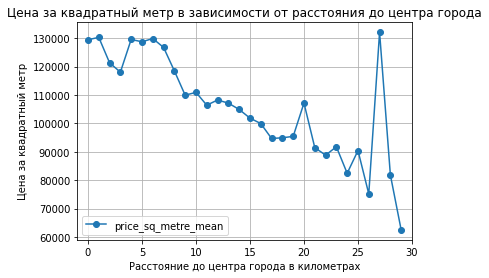

In [84]:
St_Petersburg_loc_grouped.plot(x='city_centers_nearest_int', y='price_sq_metre_mean', style='o-', xlim=(-1, 30), grid=True)
plt.title('Цена за квадратный метр в зависимости от расстояния до центра города')
plt.xlabel('Расстояние до центра города в километрах')
plt.ylabel('Цена за квадратный метр');

**Вывод**

После 7 км. цена начинает сильно снижаться. Определю, что квартиры в центре города будут считаться от 0 до 7 км.

<div style="font-size: 16px">
 
**4.8 Изучим сегмент квартир в центре Санкт-Петербурга.**

Выделю сегмент квартир в центре Санкт-Петербурга.

In [85]:
St_Petersburg_center = St_Petersburg_loc.query('city_centers_nearest_int <= 7')
f'Количество объявлений о продаже квартир в центре Санкт-Петербурга {St_Petersburg_center.shape[0]}'

'Количество объявлений о продаже квартир в центре Санкт-Петербурга 3310'

Изучим следующие параметры и для центра, и для всего города: площадь, цена, число комнат, высота потолков. 

**ПЛОЩАДЬ**

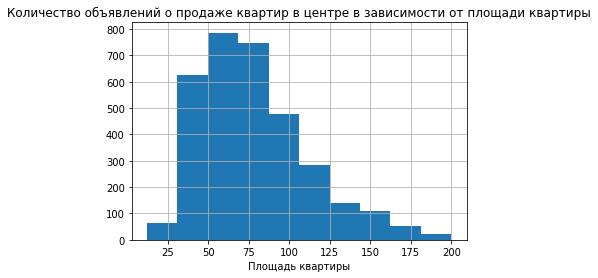

In [86]:
St_Petersburg_center['total_area'].hist()
plt.xlabel('Площадь квартиры')  
plt.title('Количество объявлений о продаже квартир в центре в зависимости от площади квартиры'); 

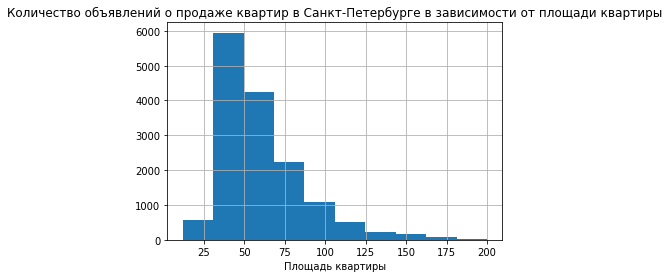

In [87]:
St_Petersburg_loc['total_area'].hist()
plt.xlabel('Площадь квартиры')  
plt.title('Количество объявлений о продаже квартир в Санкт-Петербурге в зависимости от площади квартиры'); 

Как в центре города, так и во всем городе больше всего квартир с площадью около 50 кв.м.

**ЦЕНА**

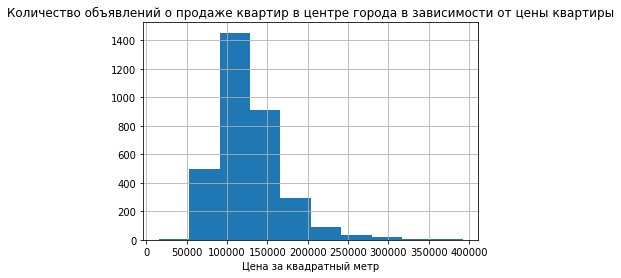

In [88]:
St_Petersburg_center['price_sq_metre'].hist()
plt.xlabel('Цена за квадратный метр')  
plt.title('Количество объявлений о продаже квартир в центре города в зависимости от цены квартиры');  

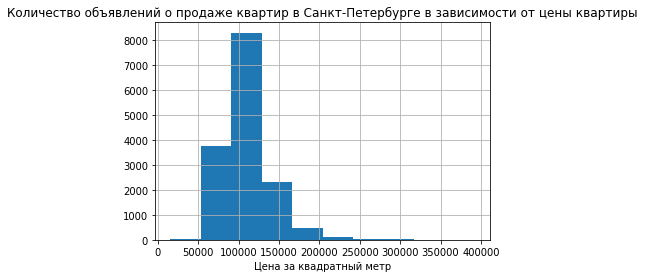

In [89]:
St_Petersburg_loc['price_sq_metre'].hist()
plt.xlabel('Цена за квадратный метр')  
plt.title('Количество объявлений о продаже квартир в Санкт-Петербурге в зависимости от цены квартиры'); 

Гистограммы особо не отличаются. И там,и там пик около значения 100000 р/кв.м.

**ЧИСЛО КОМНАТ**

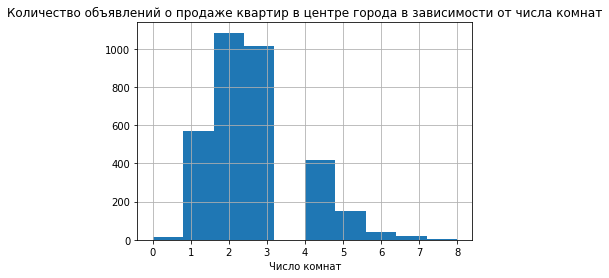

In [90]:
St_Petersburg_center['rooms'].hist()
plt.xlabel('Число комнат')  
plt.title('Количество объявлений о продаже квартир в центре города в зависимости от числа комнат'); 

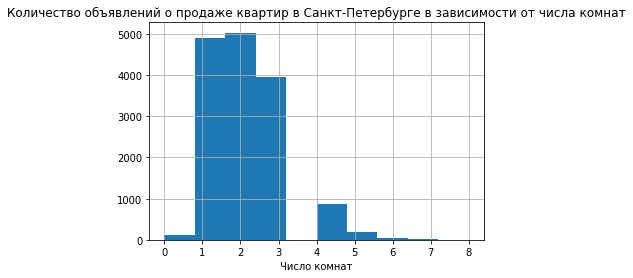

In [91]:
St_Petersburg_loc['rooms'].hist()
plt.xlabel('Число комнат')  
plt.title('Количество объявлений о продаже квартир в Санкт-Петербурге в зависимости от числа комнат'); 

В центре больше всего продают 2- и 3- комнатные квартиры, а если брать весь город, то объявлений больше всего с 1-, 2- и 3-комнатными квартирами.

**ВЫСОТА ПОТОЛКОВ**

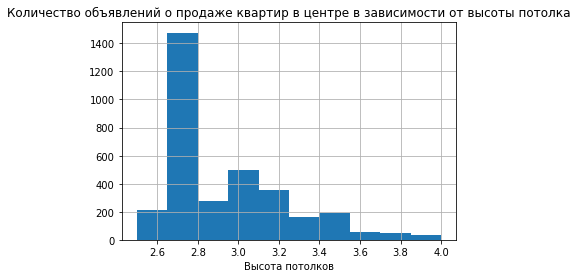

In [92]:
St_Petersburg_center['ceiling_height'].hist()
plt.xlabel('Высота потолков')  
plt.title('Количество объявлений о продаже квартир в центре в зависимости от высоты потолка'); 

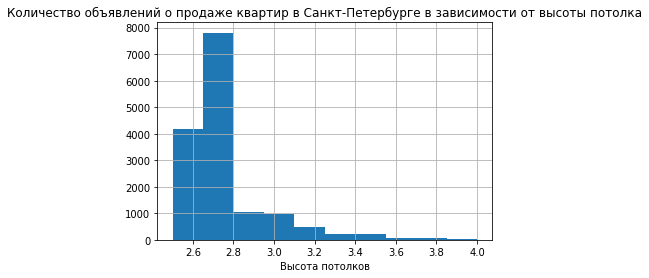

In [93]:
St_Petersburg_loc['ceiling_height'].hist()
plt.xlabel('Высота потолков')  
plt.title('Количество объявлений о продаже квартир в Санкт-Петербурге в зависимости от высоты потолка'); 

В центре города пик значений находится около от 2,65 до 2,8. Во всем городе пик такой же, но так же достаточно много квартир с высотой потолков ниже 1,60м.

<div style="font-size: 20px">
Проанализируем, какие факторы влияют на формирование цены в центре города, и во всем Санкт-Петербурге.

<div style="font-size: 14px">
Сравним, как влияют на цену такие факторы, как удаленность от центра и площадь.

**Центр города**

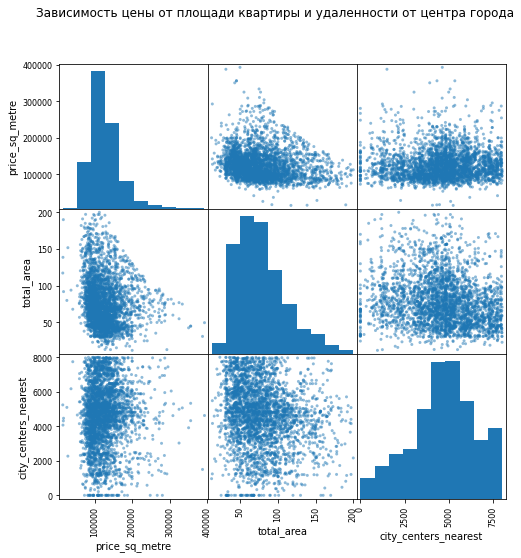

In [94]:
Peter_stat_center = St_Petersburg_center.loc[:, ['price_sq_metre', 'total_area', 'city_centers_nearest']]    
pd.plotting.scatter_matrix(Peter_stat_center, figsize=(8,8))
plt.suptitle('Зависимость цены от площади квартиры и удаленности от центра города');

**Весь Санкт-Петербург**

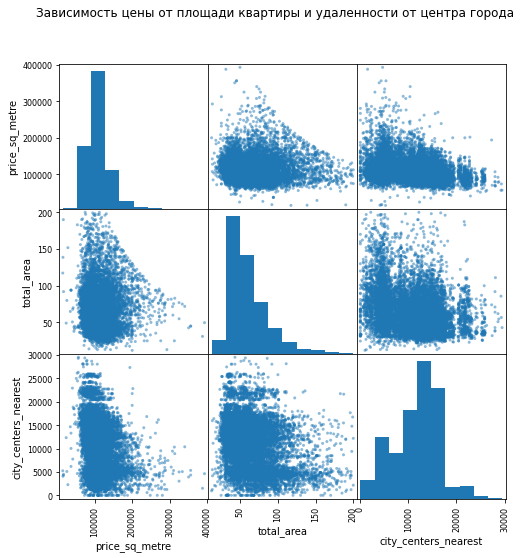

In [95]:
Peter_stat = St_Petersburg_loc.loc[:, ['price_sq_metre', 'total_area', 'city_centers_nearest']]    
pd.plotting.scatter_matrix(Peter_stat, figsize=(8,8))
plt.suptitle('Зависимость цены от площади квартиры и удаленности от центра города');

**Вывод**

Графики примерно похожи. Чем дальше от центра, тем ниже цена. И с увеличением площади, цена немного увеличивается.

<div style="font-size: 20px">
Рассмотрим зависимость цены от количества комнат.

**Центр города**

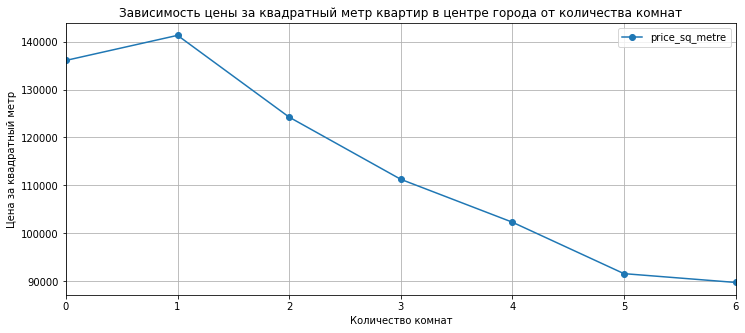

In [96]:
(
    St_Petersburg_center.pivot_table(index='rooms', values='price_sq_metre', aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0, 6), figsize=(12, 5))
)
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в центре города от количества комнат');

**Весь Санкт-Петербург**

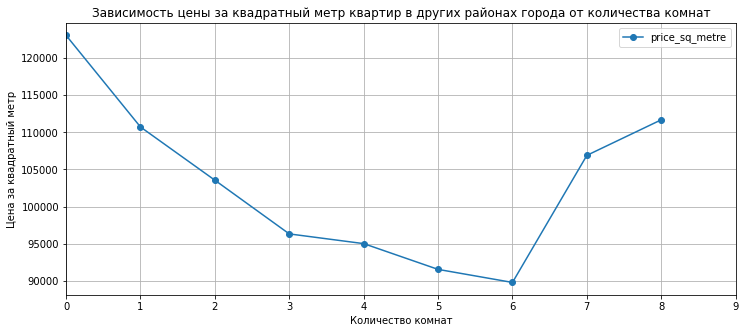

In [97]:
(
    St_Petersburg_loc.pivot_table(index='rooms', values='price_sq_metre', aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0, 9), figsize=(12, 5))
)
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в других районах города от количества комнат');

**Вывод**

В центре максимальное количество комнат - 6. И чем больше комнат, тем ниже цена. Если сравнивать со всем городом, цена за кв.му однушеки студий тоже самая высокая, и цена падает,чем больше комнат. Но у 7- и 8- комнатных цена за кв.м выше, хотя и не так, как однушек.

<div style="font-size: 20px">
Посмотрим, как влияет этаж на ценообразование.

Построим сводные таблицы.

**Центр**

In [98]:
(
    St_Petersburg_center.pivot_table(index='floor_group', values='price_sq_metre', aggfunc='median')
             .sort_values(by='price_sq_metre', ascending=False)
)

,price_sq_metre
floor_group,
другой,123555.374230
последний,113246.715083
первый,107416.666667


**Весь Санкт-Петербург**

In [99]:
(
    St_Petersburg_loc.pivot_table(index='floor_group', values='price_sq_metre', aggfunc='median')
             .sort_values(by='price_sq_metre', ascending=False)
)

,price_sq_metre
floor_group,
другой,106078.295691
последний,100575.931606
первый,93181.818182


**Вывод**

Таблицы похожи.  Самый дешевые квартиры на первом этаже, самые дорогие - на остальных этажах, кроме последнего.

<div style="font-size: 20px">
Рассмотрим, как влияет дата на цену квартиры.

**Центр**

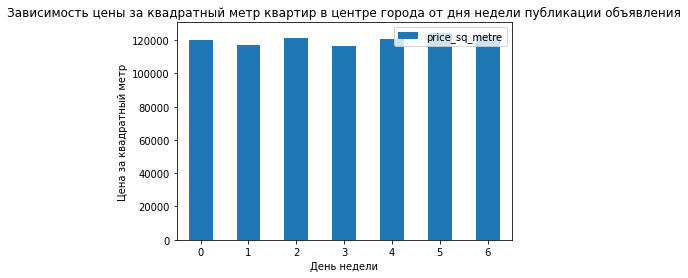

In [100]:
(
    St_Petersburg_center.pivot_table(index='weekday', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='weekday',y='price_sq_metre', rot=0)
)
plt.xlabel('День недели')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в центре города от дня недели публикации объявления');

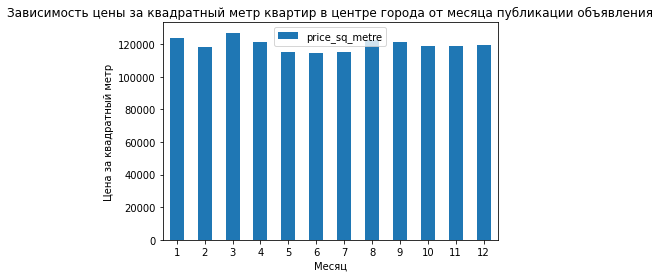

In [101]:
(
    St_Petersburg_center.pivot_table(index='month', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='month',y='price_sq_metre', rot=0)
)
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в центре города от месяца публикации объявления');

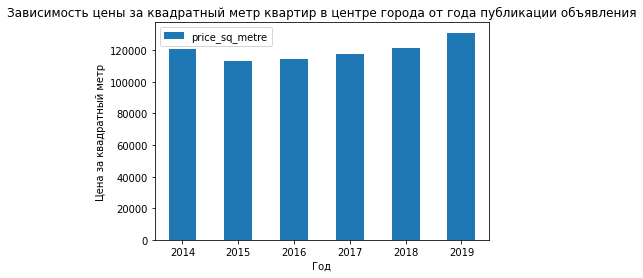

In [102]:
(
    St_Petersburg_center.pivot_table(index='year', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='year',y='price_sq_metre', rot=0)
)
plt.xlabel('Год')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в центре города от года публикации объявления');

**Весь Санкт-Петербург**

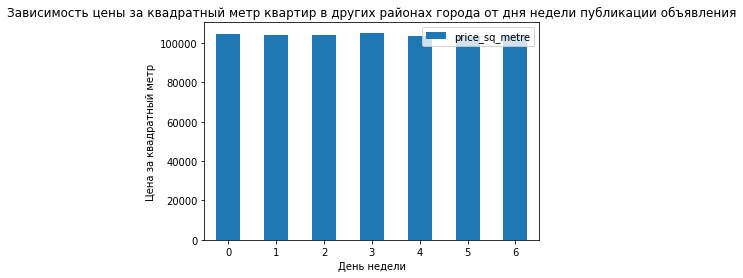

In [103]:
(
    St_Petersburg_loc.pivot_table(index='weekday', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='weekday',y='price_sq_metre', rot=0)
)
plt.xlabel('День недели')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в других районах города от дня недели публикации объявления');

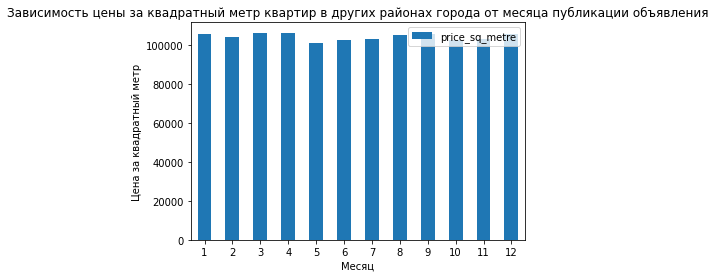

In [104]:
(
    St_Petersburg_loc.pivot_table(index='month', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='month',y='price_sq_metre', rot=0)
)
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в других районах города от месяца публикации объявления');

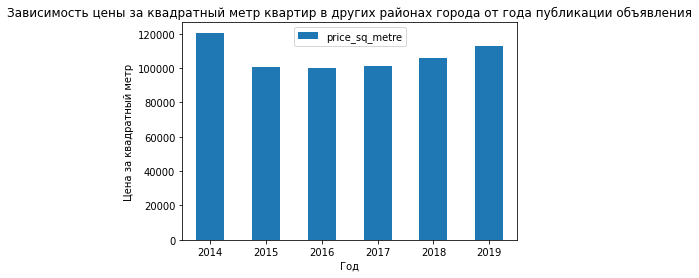

In [105]:
(
    St_Petersburg_loc.pivot_table(index='year', values='price_sq_metre', aggfunc='median')
             .reset_index()
             .plot.bar(x='year',y='price_sq_metre', rot=0)
)
plt.xlabel('Год')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр квартир в других районах города от года публикации объявления');

**Вывод**
 
Цена не зависит от даты объявления  ни в центре , ни во всем Санкт-Петербурге.

## Общий вывод

Итак, изучив входные данные, я выяснила, то в данных есть пропуски в нескольких столбцах,также обнаружились аномальные и выбивающиеся значения в колонках: `total_area` (площадь квартиры), `rooms` (количество комнат), `last_price` (цена квартиры) и `ceiling_height` (высота потолка) . Проблемы в данных я устранила. Часть строк пришлось удалить, но поскольку их доля очень мала, на исследование это не повлияло. 
Проанализировав данные, я выявила:
* квартиры продаются в большинстве случаев за 200 дней.
* факторы, которые сильнее всего влияют на стоимость квартиры - это
- **количество комнат** - у 6- и 7- комнатных квартир цена за кв.м самая высокая, но таких квартир мало. Самые дорогие квартиры (если судить по стоимости квадратного метра) - это однушки и студии. Чем больше комнат (до 6), тем меньше стоимость квадратного метра
- **этаж** - самые дешевые квартиры на первом этаже.

Цена немного зависит от площади и удаленности от центра города. У больших по площади квартир цена квадратного метра меньше, чем у маленьких. И чем дальше квартира от центра, тем она дешевле.
И совсем не зависит цена от таких факторов, как день недели и месяц даты объявления.

Итак, фактором, указывающим на мошенническую деятельность является цена значительно ниже рыночной стоимости.
